In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Partie 1 : Variables aléatoires continues

## La distribution exponentielle

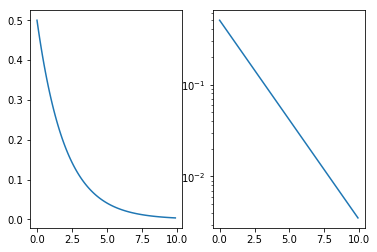

In [3]:
def my_exp(x,λ=1):
    return np.exp(-x/λ)/λ

myx = np.arange(0,10,0.1)
f,ax = plt.subplots(1,2)
ax[0].plot(myx,my_exp(myx,λ=2))
ax[1].semilogy(myx,my_exp(myx,λ=2))

In [4]:
Ns = 10000
va_exp = np.random.exponential(2,size=(Ns))
moy = np.mean(va_exp)
var = np.std(va_exp)
err = var/np.sqrt(Ns)
print("moy=",moy)
print("var=",var)
print("err=",err)

moy= 1.9971560218467712
var= 2.0059683362899507
err= 0.020059683362899507


## Statistique de la moyenne et des extremums

On génère $Ns$ variables exponentielles et on répète l'opération $Nt$ fois.

In [17]:
Nt = 10000
Ns = 10000
λ=2
est_m = []
est_min = []
est_max = []
for i in range(Nt):
    va_exp = np.random.exponential(λ,size=(Ns))
    est_m = np.append(est_m,np.mean(va_exp))
    est_min = np.append(est_min,np.min(va_exp))
    est_max = np.append(est_max,np.max(va_exp))


/home/aurele/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


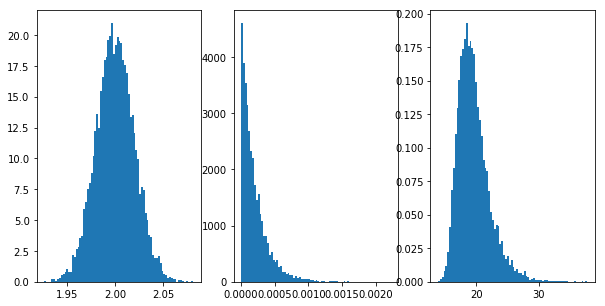

In [18]:
f,ax = plt.subplots(1,3,figsize=(10,5))
ax[0].hist(est_m,bins=80,normed=True);
ax[1].hist(est_min,bins=80,normed=True);
ax[2].hist(est_max,bins=80,normed=True);

On va recentrer les variables. Pour la moyenne, il faut s'intéresser à la variable suivante 

$$
x  = \frac{\sqrt{Ns} \left(\hat{m} - m\right)}{\sigma}
$$

où $m$ est la valeur moyenne de la distribution et $\sigma^2$ sa variance

In [20]:
va_n = (est_m-np.mean(est_m))/np.std(est_m)
va_min_n = est_min
va_max_n = (est_max-np.mean(est_max))/np.std(est_max)

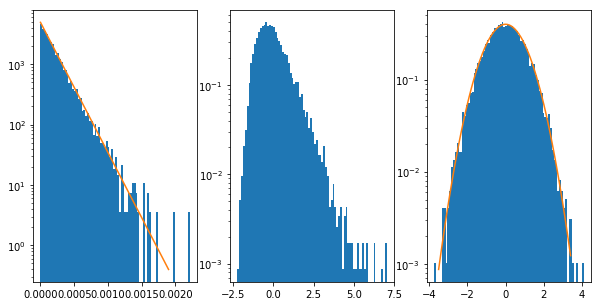

In [26]:
def my_gauss(x,m=0,σ=1):
    return 1/np.sqrt(2*np.pi*σ)*np.exp( -(x-m)**2 / (2*σ**2))

f,ax = plt.subplots(1,3,figsize=(10,5))
myx = np.arange(0,0.002,0.0001)
myx2 = np.arange(-3.5,3.5,0.1)
λ_emp = np.mean(va_min_n)

ax[0].hist(va_min_n,bins=80,normed=True,log=True);
ax[0].plot(myx,my_exp(myx,λ_emp))
ax[1].hist(va_max_n,bins=80,normed=True,log=True);
ax[2].hist(va_n,bins=80,normed=True,log=True);
ax[2].plot(myx2,my_gauss(myx2))

1. On voit que la distribution du minimum suit une loi exponentielle (aucune valeur négative, une pente linéaire en échelle log-lin). On peut donc ajuster la pdf d'une loi exponentielle en ajuste la paramètre $\lambda$ selon la moyenne empirique.
2. On voit que la distribution du maximum suit une distribution inconnue. La queue de distribution des grandes valeurs de $x$ semble suivre une décroissance exponentielle (comportement linéaire). La queue pour des petites valeurs de $x$ semble décroître très rapidement.
3. On identifie parfaitement la distribution gaussienne, on peut d'ailleurs tracer la pdf en surimpression.

Conclusion : la distributions des valeurs extrêmes est très différentes de celle de la moyenne. On peut caractériser (ici) celle du minimum de façon empirique. Celle du maximum est plus complexe. On voit un décroissance plus lente que la gaussienne pour les $x$ grands et beaucoup plus rapide pour les $x$ petits

# Partie 2 : SVD et MNIST

In [27]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

f = gzip.open('../../M1Pro-ML/mnist.pkl.gz', 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
p = u.load()
train_set, valid_set, test_set = p

## On décompose les 3 et les 6 ensembles

In [30]:
X3 = train_set[0][np.where(train_set[1]==3)].T
X6 = train_set[0][np.where(train_set[1]==6)].T
X = np.concatenate((X3,X6),1)
X = np.random.permutation(X.T).T

In [31]:
u,s,v = np.linalg.svd(X/np.sqrt(X.shape[1]))

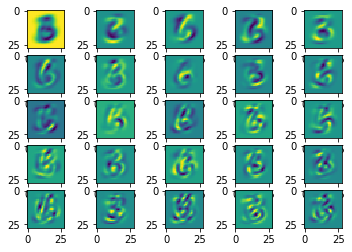

In [32]:
f,ax = plt.subplots(5,5)
idx=0
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(u[:,idx].reshape(28,28))
        idx += 1

In [33]:
sc_u3 = X3.T.dot(u)
sc_u6 = X6.T.dot(u)

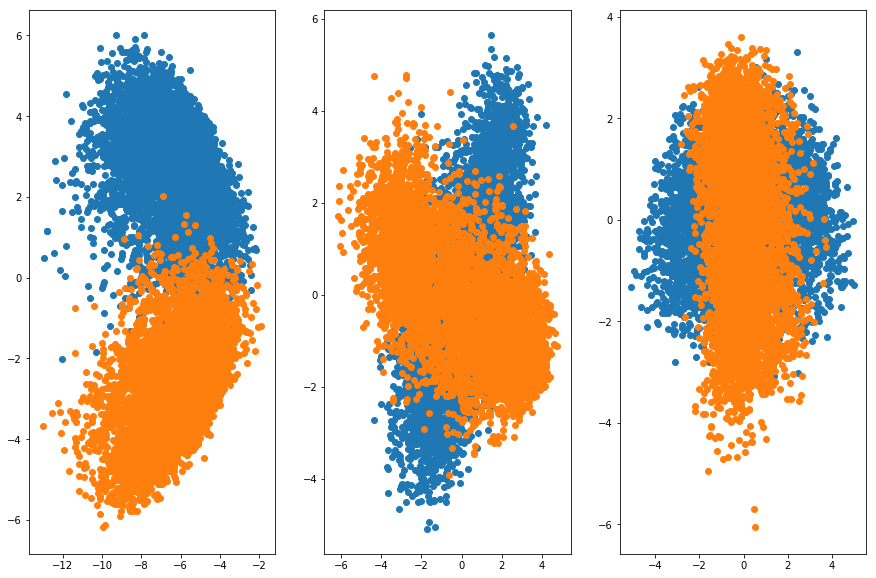

In [34]:
f,ax = plt.subplots(1,3,figsize=(15,10))
ax[0].scatter(sc_u3[:,0],sc_u3[:,1])
ax[0].scatter(sc_u6[:,0],sc_u6[:,1])
ax[1].scatter(sc_u3[:,2],sc_u3[:,3])
ax[1].scatter(sc_u6[:,2],sc_u6[:,3])
ax[2].scatter(sc_u3[:,4],sc_u3[:,5])
ax[2].scatter(sc_u6[:,4],sc_u6[:,5])
plt.show()

On voit que la direction 2 (axe des ordonnées de la figure 1) permettrait de faire une séparation raisonnable.

In [37]:
print("Fraction de bonnes classif des 3=",np.where(sc_u3[:,1]>0)[0].shape[0]/X3.shape[1])
print("Fraction de bonnes classif des 6=",np.where(sc_u6[:,1]<0)[0].shape[0]/X6.shape[1])


Fraction de bonnes classif des 3= 0.9639286414428544
Fraction de bonnes classif des 6= 0.980004039587962


## On regarde maintenant le cas où on effectue une SVD sur les 3 et les 6 séparément

In [38]:
u3,s3,v3 = np.linalg.svd(X3/np.sqrt(X3.shape[1]))
u6,s6,v6 = np.linalg.svd(X6/np.sqrt(X6.shape[1]))

In [41]:
# On calcule l'erreur de reconstruction pour les 3 et les 6
im3 = np.random.randint(X3.shape[1])
MSE3 = np.array([])
im6 = np.random.randint(X6.shape[1])
MSE6 = np.array([])
for k in range(1,100):
    proj = np.matmul(X3[:,im3].T,u3[:,:k])
    im_rec = np.matmul(proj,u3[:,:k].T)
    MSE3 = np.append(MSE3,np.sqrt(np.mean(np.square(X3[:,im3]-im_rec))))
    proj = np.matmul(X6[:,im6].T,u6[:,:k])
    im_rec = np.matmul(proj,u6[:,:k].T)
    MSE6 = np.append(MSE6,np.sqrt(np.mean(np.square(X6[:,im6]-im_rec))))

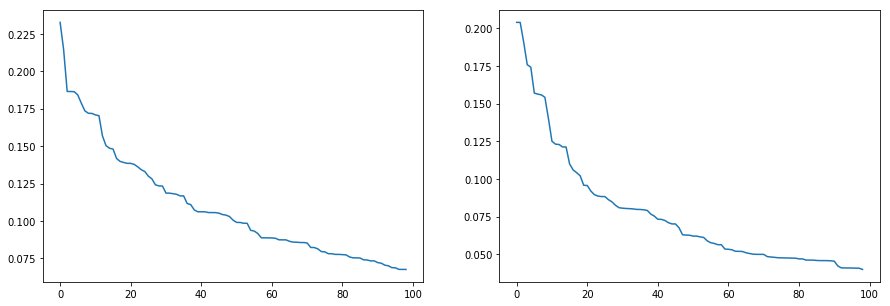

In [45]:
f,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(MSE3)
ax[1].plot(MSE6)

In [46]:
idx_num = []
for c in range(10):
    idx_ = np.where(train_set[1]==c)
    idx_num.append(idx_)

In [47]:
MSE_all = np.array([])
for c in range(10):
    MSE = np.array([])
    im = idx_num[c][0][0]
    for k in range(100):
        proj = np.matmul(train_set[0][im,:],u3[:,:k])
        im_rec = np.matmul(proj,u3[:,:k].T)
        MSE = np.append(MSE,np.sqrt(np.mean(np.square(train_set[0][im,:]-im_rec))))
    MSE_all = np.append(MSE_all,MSE)

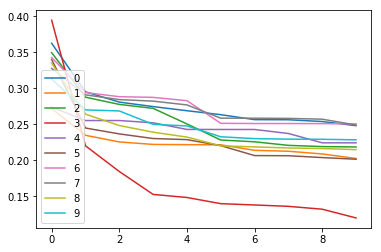

In [48]:
for c in range(10):
    plt.plot(MSE_all.reshape(10,100)[c,:10],label=str(c))
plt.legend()
plt.show()

In [49]:
MSE_all = np.array([])
for c in range(10):
    MSE = np.array([])
    im = idx_num[c][0][0]
    for k in range(100):
        proj = np.matmul(train_set[0][im,:],u6[:,:k])
        im_rec = np.matmul(proj,u6[:,:k].T)
        MSE = np.append(MSE,np.sqrt(np.mean(np.square(train_set[0][im,:]-im_rec))))
    MSE_all = np.append(MSE_all,MSE)

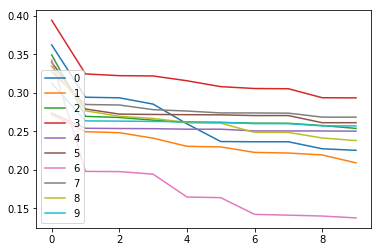

In [50]:
for c in range(10):
    plt.plot(MSE_all.reshape(10,100)[c,:10],label=str(c))
plt.legend()
plt.show()

On voit que l'erreur de reconstruction dimininue plus rapidement lorsque la base utilisée est celle du chiffre